In [1]:
#Import all the neccessary libraries
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Augment the images
datagen = ImageDataGenerator(
rotation_range=15,
rescale=1/255,
zoom_range=0.1,
horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

In [21]:
#Train dataset
trainDatagen = datagen.flow_from_directory(directory='../input/face-mask-12k-images-dataset/Face Mask Dataset/Train',
                                           target_size=(128, 128),
                                           class_mode = 'binary',
                                           batch_size = 64)

Found 10000 images belonging to 2 classes.


In [22]:
#Assign numbers to each category
trainDatagen.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [23]:
#Validation dataset
valDatagen = datagen.flow_from_directory(directory='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/',
                                           target_size=(128, 128),
                                           class_mode = 'binary',
                                           batch_size = 64)

Found 800 images belonging to 2 classes.


In [24]:
#Validation dataset
testDatagen = datagen.flow_from_directory(directory='../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/',
                                           target_size=(128, 128),
                                           class_mode = 'binary',
                                           batch_size = 64)

Found 992 images belonging to 2 classes.


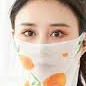

In [16]:
from IPython.display import Image
Image(filename='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1358.png')

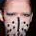

In [17]:
Image(filename='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithMask/1370.png')

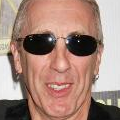

In [18]:
Image(filename='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1166.png')

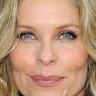

In [19]:
Image(filename='../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1204.png')

In [25]:
#Define the CNN layers
model = Sequential() #I'm going to be creating a sequential model
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128, 128, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) #Compile the model

model.summary() #Get the model's summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [26]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau #Import callback functions
earlystop=EarlyStopping(patience=10) #Monitor the performance. If it dips, then stop training
learning_rate_reduce=ReduceLROnPlateau(monitor='val_acc',min_lr=0.0001) #Change learning rate if not performing good enough
callbacks=[earlystop,learning_rate_reduce]

In [28]:
#Start training the model with 10 epochs
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=10,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )

Epoch 1/10
157/157 [==============================] - 154s 982ms/step - loss: 0.2709 - accuracy: 0.8647 - val_loss: 0.1164 - val_accuracy: 0.9600
Epoch 2/10
157/157 [==============================] - 141s 896ms/step - loss: 0.1302 - accuracy: 0.9540 - val_loss: 0.1061 - val_accuracy: 0.9712
Epoch 3/10
157/157 [==============================] - 149s 948ms/step - loss: 0.1105 - accuracy: 0.9609 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 4/10
157/157 [==============================] - 139s 888ms/step - loss: 0.1035 - accuracy: 0.9628 - val_loss: 0.0680 - val_accuracy: 0.9825
Epoch 5/10
157/157 [==============================] - 139s 887ms/step - loss: 0.0884 - accuracy: 0.9687 - val_loss: 0.0836 - val_accuracy: 0.9825
Epoch 6/10
157/157 [==============================] - 139s 883ms/step - loss: 0.0917 - accuracy: 0.9700 - val_loss: 0.0780 - val_accuracy: 0.9762
Epoch 7/10
157/157 [==============================] - 139s 888ms/step - loss: 0.0777 - accuracy: 0.9746 - val_loss: 0.0640 -

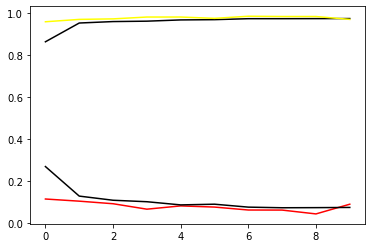

In [29]:
plt.plot(history.history['val_loss'],color='r')
plt.plot(history.history['accuracy'],color='black')
plt.plot(history.history['loss'],color='black')
plt.plot(history.history['val_accuracy'],color='yellow')
plt.show() #Plot the model loss, accuracy, validation loss and validation accuracy

In [31]:
predict=model.predict_generator(testDatagen) #predict the testing images

In [32]:
predict

array([[1.87291026e-01],
       [5.00282645e-03],
       [3.91394815e-06],
       [2.16247141e-02],
       [1.97300096e-08],
       [9.85921741e-01],
       [1.48413335e-07],
       [1.18755741e-10],
       [1.20542943e-02],
       [3.60716513e-05],
       [9.92773235e-01],
       [6.91404164e-01],
       [9.72285867e-01],
       [1.14910245e-01],
       [9.31232691e-01],
       [5.24558200e-05],
       [1.34617090e-04],
       [5.08759618e-02],
       [2.95779586e-07],
       [9.50080514e-01],
       [9.90754306e-01],
       [1.69596076e-03],
       [1.09222531e-03],
       [8.10175598e-01],
       [9.22849995e-06],
       [3.57802854e-09],
       [7.22370260e-07],
       [7.50696659e-01],
       [1.81276310e-08],
       [9.50976491e-01],
       [9.81482863e-01],
       [1.46315694e-01],
       [9.30170178e-01],
       [9.64318514e-01],
       [9.11131740e-01],
       [7.77652604e-05],
       [1.17218494e-03],
       [8.86024952e-01],
       [1.36425274e-06],
       [1.07628107e-03],


In [33]:
model.save('model.h5')

In [ ]:
import pandas as pd
data = pd.Datframe()